In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [2]:
np.__version__

'1.19.5'

In [3]:
df = pd.read_csv('data/calls_weather_tfk.csv')

In [4]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [5]:
df.set_index(df['DATE'], inplace = True)

In [6]:
df['num_calls'].describe()

count    25465.000000
mean       136.328569
std         54.236394
min          3.000000
25%         88.000000
50%        128.000000
75%        184.000000
max        429.000000
Name: num_calls, dtype: float64

<AxesSubplot:xlabel='DATE'>

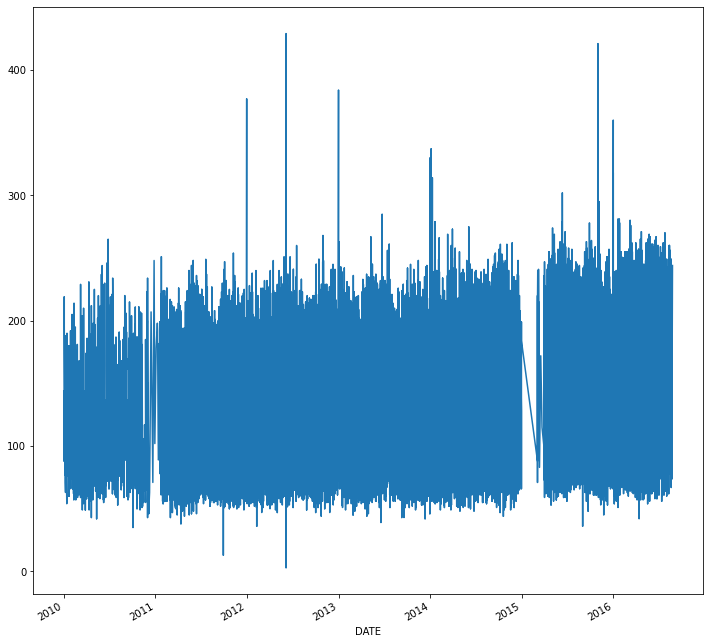

In [7]:
plt.figure(figsize=(12,12))
df['num_calls'].plot()

In [8]:
features = ['Unnamed: 0', 'BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 
            'RICHMOND / STATEN ISLAND', 'UNKNOWN', 'NAME', 'num_calls', 'DATE']


X = df.drop(columns= features)

X = X.fillna(X['AWND'].mean())

X = pd.get_dummies(data = X, columns = ['STATION'], drop_first = True)

y = df['num_calls']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [9]:
X

,year,month,day,hour,AWND,PRCP,SNOW,SNWD,TMAX,TMIN,TAVG_CALC,Incidences
DATE,,,,,,,,,,,,
2010-01-02,2010,1,2,2,12.530000,0.02,0.2,0.0,34.0,17.0,25.5,1
2010-01-02,2010,1,2,3,12.530000,0.02,0.2,0.0,34.0,17.0,25.5,1
2010-01-03,2010,1,3,12,14.320000,0.00,0.0,0.0,22.0,17.0,19.5,1
2010-01-04,2010,1,4,1,10.740000,0.00,0.0,0.0,30.0,19.0,24.5,2
2010-01-04,2010,1,4,10,10.740000,0.00,0.0,0.0,30.0,19.0,24.5,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-23,2016,8,23,21,1.790000,0.00,0.0,0.0,82.0,61.0,71.5,8
2016-08-23,2016,8,23,22,1.790000,0.00,0.0,0.0,82.0,61.0,71.5,11
2016-08-23,2016,8,23,23,1.790000,0.00,0.0,0.0,82.0,61.0,71.5,8


In [10]:
train_sequences = TimeseriesGenerator(X_train_sc, y_train, length = 3, batch_size = 64)

test_sequences = TimeseriesGenerator(X_test_sc, y_test, length=3, batch_size = 64)

In [11]:
d = train_sequences[0][0][0].shape
d

(3, 12)

In [12]:
X.shape

(25465, 12)

#### **Need to rework the structure of the Neural Network to be able to run time series**

In [20]:
stop = EarlyStopping(monitor = 'mae', patience = 10, min_delta = .01)

# set up structure
model = Sequential()
model.add(GRU(8, input_shape=(3,12), return_sequences=True))
model.add(GRU(8,return_sequences=False))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation= None))

# compile
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mae'])

In [16]:
train_mae = results.history['loss']
test_mae =  results.history['val_loss']

plt.figure(figsize=(12, 8))
plt.plot(train_mae, label='Training Loss', color='navy')
plt.plot(test_mae, label='Testing Loss', color='skyblue')
plt.legend();

NameError: name 'results' is not defined

In [63]:
results.history['val_loss'][-1], results.history['loss'][-1]

(502.8142395019531, 474.0042419433594)

In [64]:
results.history['mae'][-1], results.history['val_mae'][-1]

(16.58083152770996, 17.397705078125)